In [10]:
from fastai.callbacks import *
from fastai.vision import *

In [27]:
path = untar_data(URLs.MNIST_TINY)
path

PosixPath('/home/tako/.fastai/data/mnist_tiny')

In [28]:
data = ImageDataBunch.from_folder(path)

In [ ]:
class TrackPredictionSTDCallback(Callback):
    _order = -20 #Need to run before fit_one_cycle
    def __init__(self, learn:Learner, name:str='epoch', epoch_offset:int=None):
        "Store the std of predict_with_mc_dropout."

    def on_epoch_end(self, epoch, **kwargs:Any)->None:
        with self.path.open('w') as f: f.write(f'{epoch}')


In [29]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy, callback_fns=ActivationStats)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


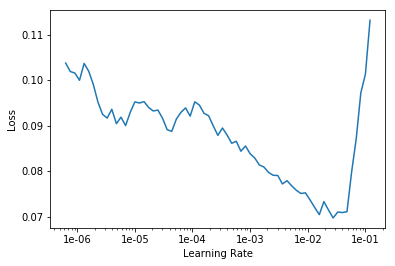

In [31]:
learn.lr_find()
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(5,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.084796,0.232727,0.914163,00:01
1,0.051924,0.182785,0.947067,00:01
2,0.039551,0.092231,0.974249,00:01
3,0.036561,0.071941,0.978541,00:01
4,0.029328,0.065863,0.984263,00:01


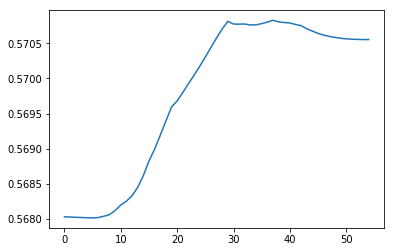